2.9267048253105026 -11.87450897566805


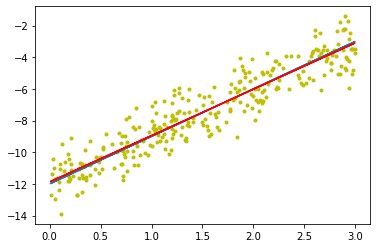

In [33]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

np.random.seed(0)

num_points = 300
a = 3
b = -12
noise = np.random.normal(0, 1, num_points)
x = np.random.uniform(0, 3, num_points)
y = a * x + b + noise

plt.scatter(x, y, marker = '.', color = 'y')
plt.plot()
plt.plot(x, a * x + b)


id_x = np.arange(num_points)
np.random.shuffle(id_x)
train_x = id_x
x_train = x[train_x]
y_train = y[train_x]

lr = 0.01
n_epoch = 300

for epoch in range(n_epoch):
    y_test = a * x_train + b
    error = y_train - y_test
    a_gr = - 2 * (x_train * error).mean()
    b_gr = -2 * error.mean()
    
    a = a - lr * a_gr
    b = b - lr * b_gr
print(a, b)

plt.plot(x, a * x + b, color = 'r')

[[56  0]
 [ 1 63]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        56
           1       1.00      0.98      0.99        64

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

0.9916666666666667


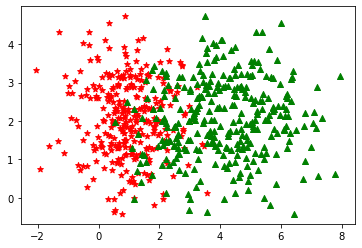

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

mean_1 = [1, 2]
cov_1 = [[1, 0], [0, 1]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)
plt.scatter(x_1[:, 0], x_1[:, 1], marker = '*', color = 'r')

mean_2 = [4, 7]
cov_2 = [[2, 0], [0, 2]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)
plt.scatter(x_2[:, 0], x_1[:, 1], marker = '^', color = 'g')

x = np.concatenate([x_1, x_2])
labels = np.array([0] * num_points + [1] * num_points)

columns = ['x', 'y']
df = pd.DataFrame(data=x, columns=columns)
df['l'] = labels

X = df.drop(['l'], axis=1)
Y = df['l']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test)


classifier = LogisticRegression(solver='lbfgs',random_state=0)
classifier.fit(scaled_X_train, Y_train)
pred = classifier.predict(scaled_X_test)

print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))
print(accuracy_score(Y_test,pred))